In [4]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import missingno as msno

In [5]:
retail = pd.read_csv('OnlineRetail.csv', sep=",", encoding="ISO-8859-1", header=0)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [6]:
# https://medium.com/@hhuseyincosgun/customer-segmentation-rfm-analysis-recency-frequency-monetary-5b29d5d45e35

In [7]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<Axes: >

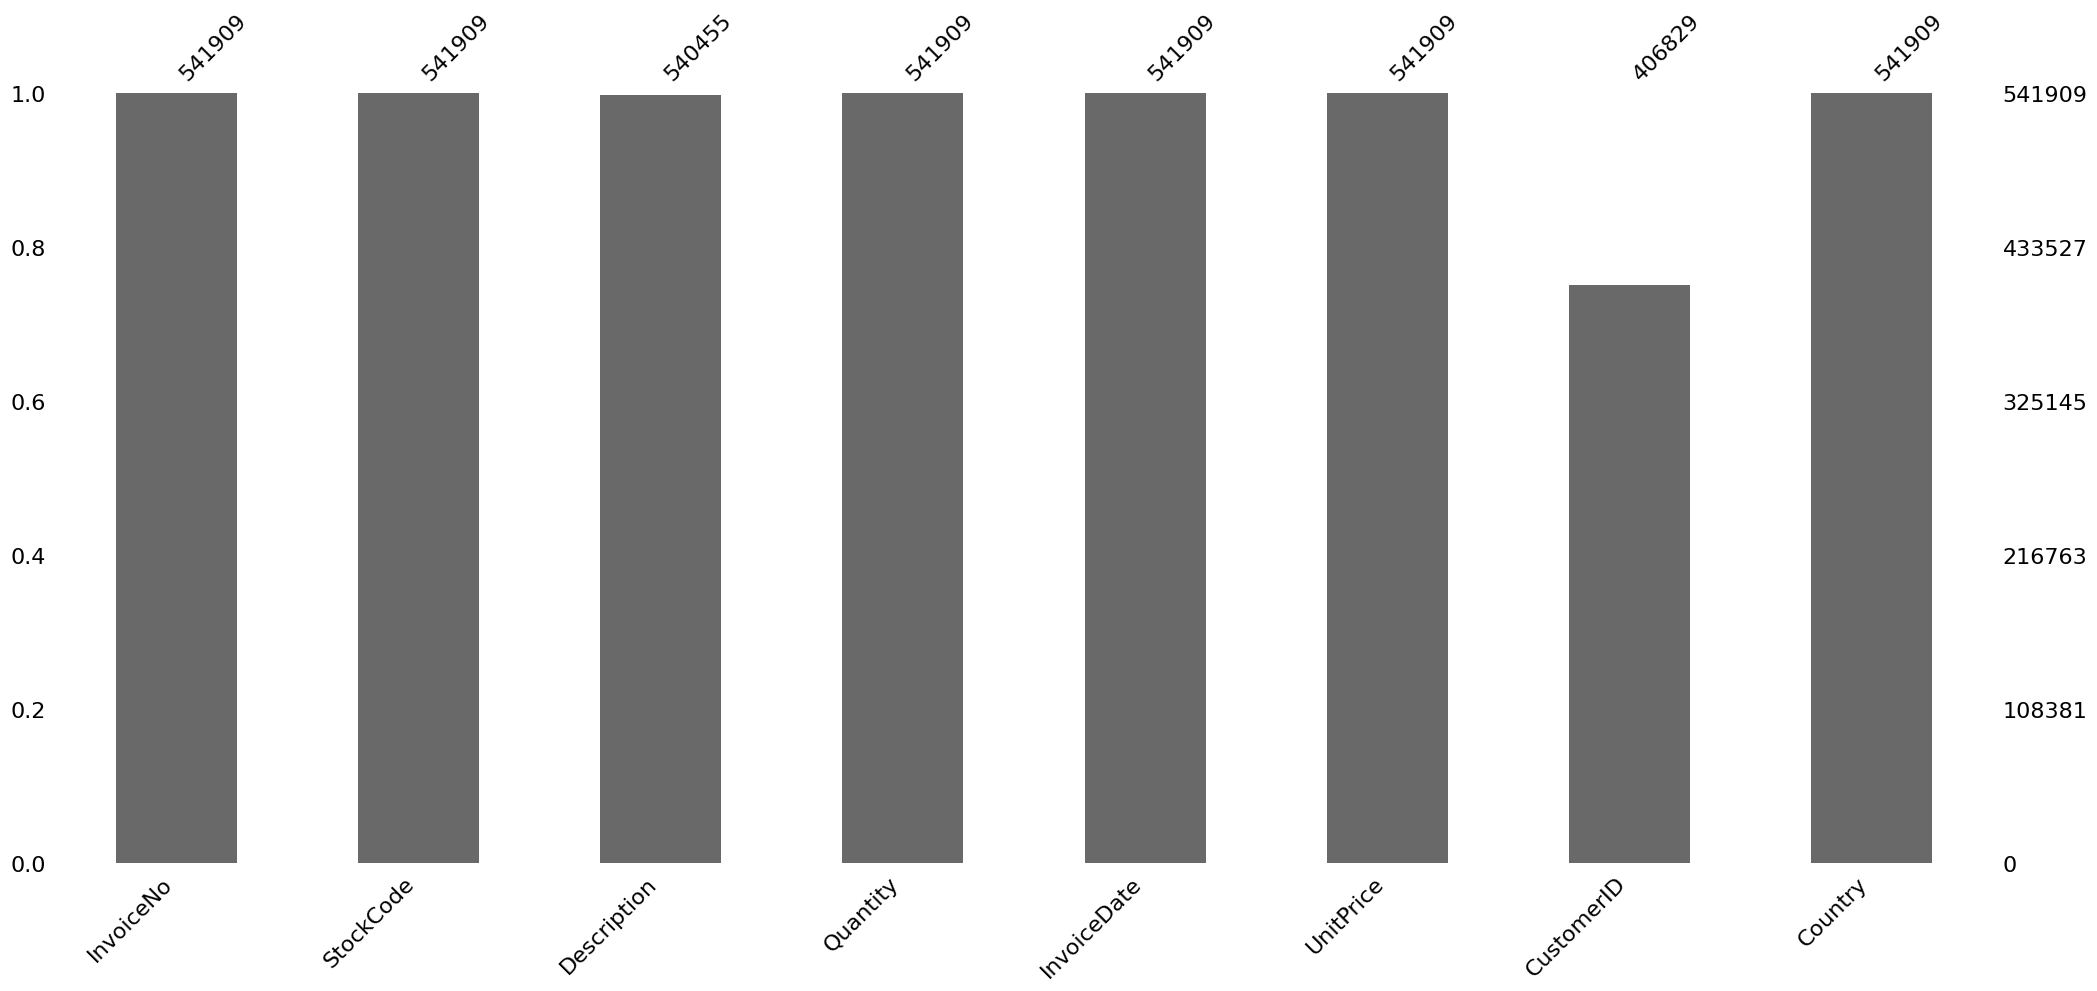

In [8]:
msno.bar(retail)

In [9]:
retail = retail.dropna()

retail['CustomerID'] = retail['CustomerID'].astype(int).astype(str)


<ipython-input-9-dece4bd39e0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['CustomerID'] = retail['CustomerID'].astype(int).astype(str)


In [10]:
retail.columns = retail.columns.str.lower()
retail

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680,France


In [12]:
retail["monetary"] = retail["quantity"]*retail["unitprice"]
retail["order_date"] = pd.to_datetime(retail["invoicedate"],format="%d-%m-%Y %H:%M")
retail.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,monetary,order_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,United Kingdom,15.30,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,United Kingdom,22.00,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34,2010-12-01 08:26:00


In [13]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    406829 non-null  object        
 1   stockcode    406829 non-null  object        
 2   description  406829 non-null  object        
 3   quantity     406829 non-null  int64         
 4   invoicedate  406829 non-null  object        
 5   unitprice    406829 non-null  float64       
 6   customerid   406829 non-null  object        
 7   country      406829 non-null  object        
 8   monetary     406829 non-null  float64       
 9   order_date   406829 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 34.1+ MB


In [15]:
retail["diff_days"] = (retail["order_date"].max() - retail["order_date"]).dt.days
retail.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,monetary,order_date,diff_days
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,United Kingdom,15.30,2010-12-01 08:26:00,373
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34,2010-12-01 08:26:00,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,United Kingdom,22.00,2010-12-01 08:26:00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34,2010-12-01 08:26:00,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34,2010-12-01 08:26:00,373


In [17]:
rfm = retail.groupby(["customerid"]).agg({
    'diff_days':'min',
    'invoiceno':pd.Series.nunique,
    'monetary':'sum'
}).reset_index()

rfm.head()

,customerid,diff_days,invoiceno,monetary
0,12346,325,2,0.00
1,12347,1,7,4310.00
2,12348,74,4,1797.24
3,12349,18,1,1757.55
4,12350,309,1,334.40


In [18]:
rfm.columns = ['customerid','recency','frequency','monetary']

In [19]:
rfm.head()

,customerid,recency,frequency,monetary
0,12346,325,2,0.00
1,12347,1,7,4310.00
2,12348,74,4,1797.24
3,12349,18,1,1757.55
4,12350,309,1,334.40


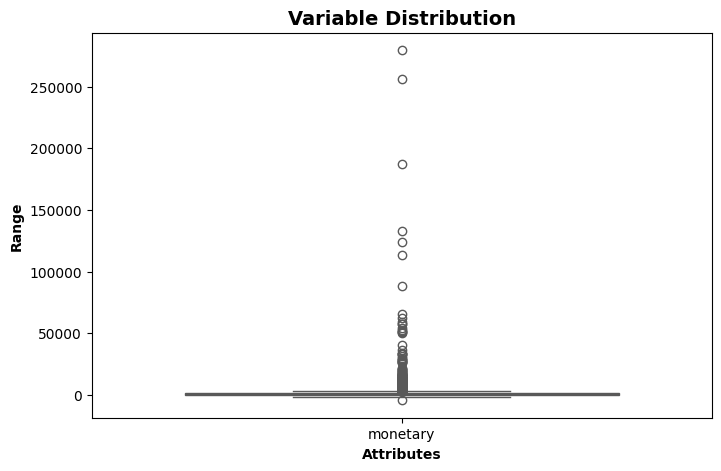

In [21]:
import seaborn as sns

attributes = ['monetary']
plt.rcParams['figure.figsize'] = [8,5]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.show()

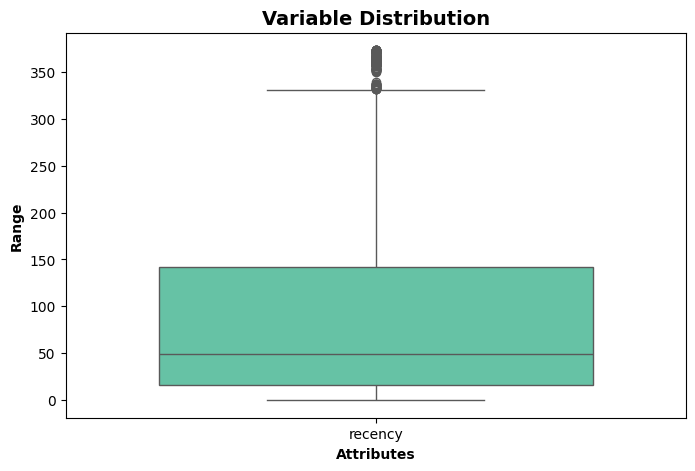

In [22]:
import seaborn as sns

attributes = ['recency']
plt.rcParams['figure.figsize'] = [8,5]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.show()

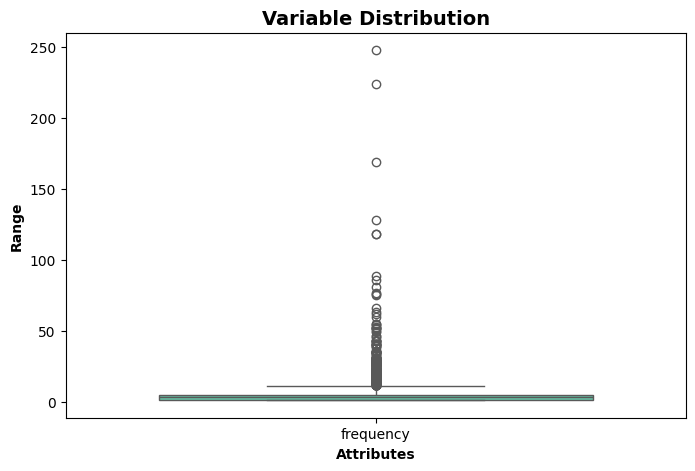

In [23]:
import seaborn as sns

attributes = ['frequency']
plt.rcParams['figure.figsize'] = [8,5]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.show()

In [24]:
## Interquartile Range
def get_iqr(df,col):
    q1 = df[col].quantile(0.05)
    q3 = df[col].quantile(0.95)
    iqr = q3-q1
    return q1,q3,iqr


col = 'monetary'
q1, q3, iqr = get_iqr(rfm,col)

print(q1)
print(q3)
print(iqr)

101.13850000000005
5625.003999999995
5523.865499999995


In [26]:
q3 + 1.5*iqr

13910.802249999988

In [27]:
q1 - 1.5*iqr

-8184.6597499999925

In [28]:
rfm = rfm[(rfm["monetary"]>= q1 - 1.5*iqr) & (rfm["monetary"] <= q3 + 1.5*iqr)]

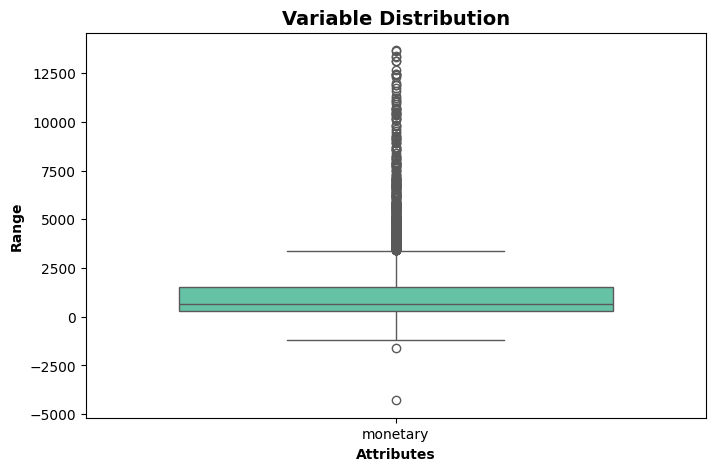

In [29]:

attributes = ['monetary']
plt.rcParams['figure.figsize'] = [8,5]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.show()

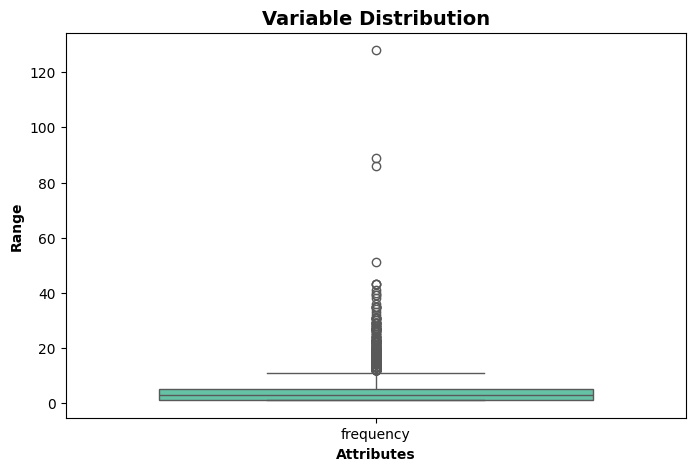

In [30]:
rfm = rfm[(rfm["frequency"]>= q1 - 1.5*iqr) & (rfm["frequency"] <= q3 + 1.5*iqr)]
attributes = ['frequency']
plt.rcParams['figure.figsize'] = [8,5]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.show()

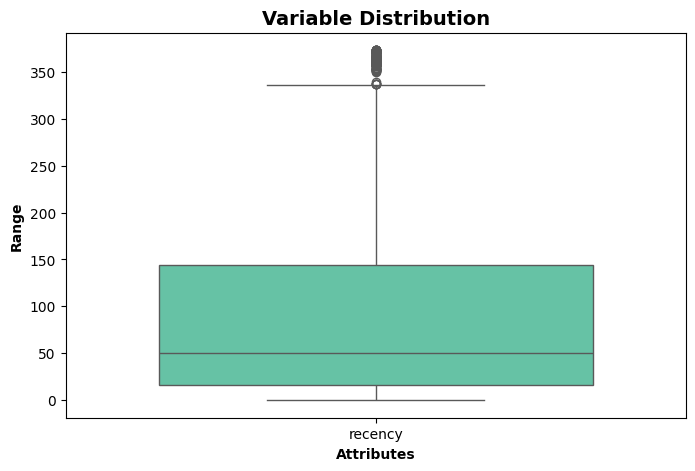

In [31]:
rfm = rfm[(rfm["recency"]>= q1 - 1.5*iqr) & (rfm["recency"] <= q3 + 1.5*iqr)]
attributes = ['recency']
plt.rcParams['figure.figsize'] = [8,5]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.show()

In [32]:
rfm = rfm.query("monetary > 0").reset_index(drop=True)

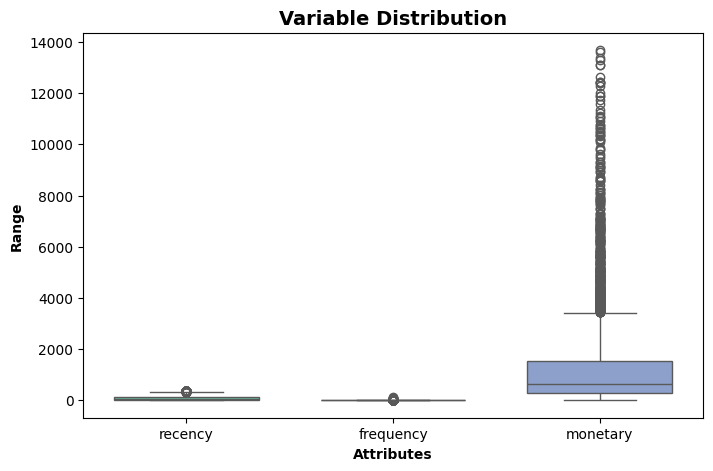

In [33]:
attributes = ['recency','frequency','monetary']
plt.rcParams['figure.figsize'] = [8,5]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.show()

In [36]:
rfm.head(5)

,customerid,recency,frequency,monetary
0,12347,1,7,4310.00
1,12348,74,4,1797.24
2,12349,18,1,1757.55
3,12350,309,1,334.40
4,12352,35,11,1545.41


In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(rfm[attributes])
scaled[0:5]

array([[-0.90073391,  0.43377871,  1.67118167],
       [-0.16556671, -0.08624341,  0.27025665],
       [-0.72953059, -0.60626552,  0.24812851],
       [ 2.20106745, -0.60626552, -0.54531235],
       [-0.55832727,  1.12714153,  0.12985528]])

In [43]:
rfm_scaled = pd.DataFrame(scaled)
rfm_scaled.columns = ['recency','frequency','monetary']
rfm_scaled.head()

,recency,frequency,monetary
0,-0.900734,0.433779,1.671182
1,-0.165567,-0.086243,0.270257
2,-0.729531,-0.606266,0.248129
3,2.201067,-0.606266,-0.545312
4,-0.558327,1.127142,0.129855


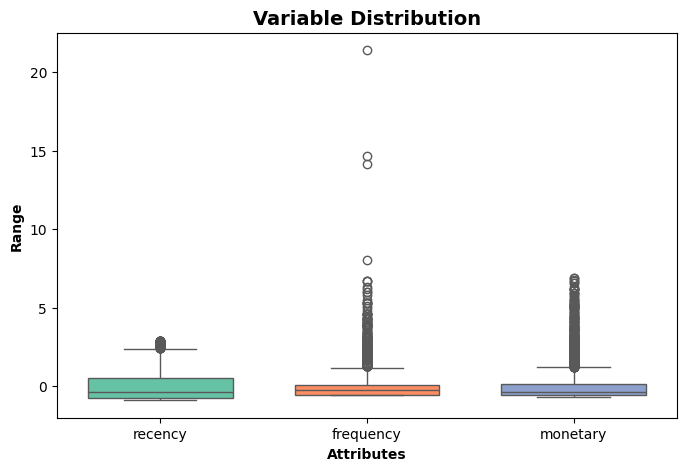

In [39]:
attributes = ['recency','frequency','monetary']
plt.rcParams['figure.figsize'] = [8,5]
sns.boxplot(data = rfm_scaled[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.show()

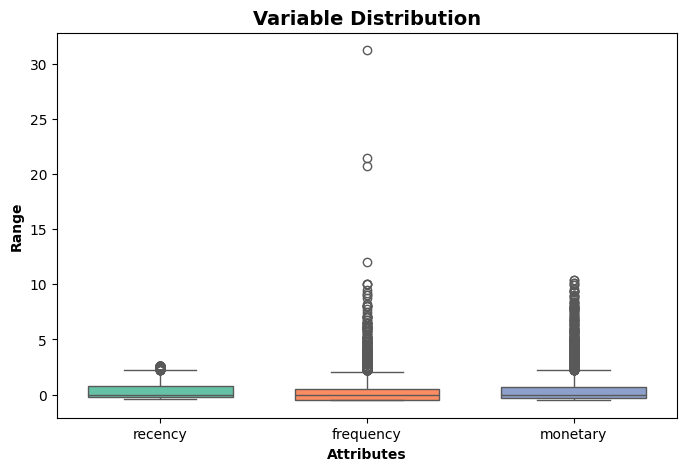

In [41]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled = scaler.fit_transform(rfm[attributes])
#scaled[0:5]
attributes = ['recency','frequency','monetary']
rfm_scaled = pd.DataFrame(scaled)
rfm_scaled.columns = attributes
#rfm_scaled.head()

plt.rcParams['figure.figsize'] = [8,5]
sns.boxplot(data = rfm_scaled[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.show()

In [46]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=5, max_iter=50)
kmean.fit(rfm_scaled)

KMeans(max_iter=50, n_clusters=5)

In [47]:
kmean.labels_

array([3, 1, 1, ..., 1, 3, 1], dtype=int32)

In [48]:
len(kmean.labels_)

4263

In [50]:
rfm['cluster_id'] = kmean.labels_
rfm.head()

,customerid,recency,frequency,monetary,cluster_id
0,12347,1,7,4310.00,3
1,12348,74,4,1797.24,1
2,12349,18,1,1757.55,1
3,12350,309,1,334.40,0
4,12352,35,11,1545.41,3


In [53]:
from scipy.spatial.distance import cdist
K = range(2,10)
distortions = []
inertias = []

for k in K:
  kmeans = KMeans(n_clusters=k, max_iter=50)
  kmeans.fit(rfm_scaled)
  distortions.append(sum(np.min(cdist(rfm_scaled, kmeans.cluster_centers_,
                                    'euclidean'), axis=1)) / rfm_scaled.shape[0])
  inertias.append(kmeans.inertia_)


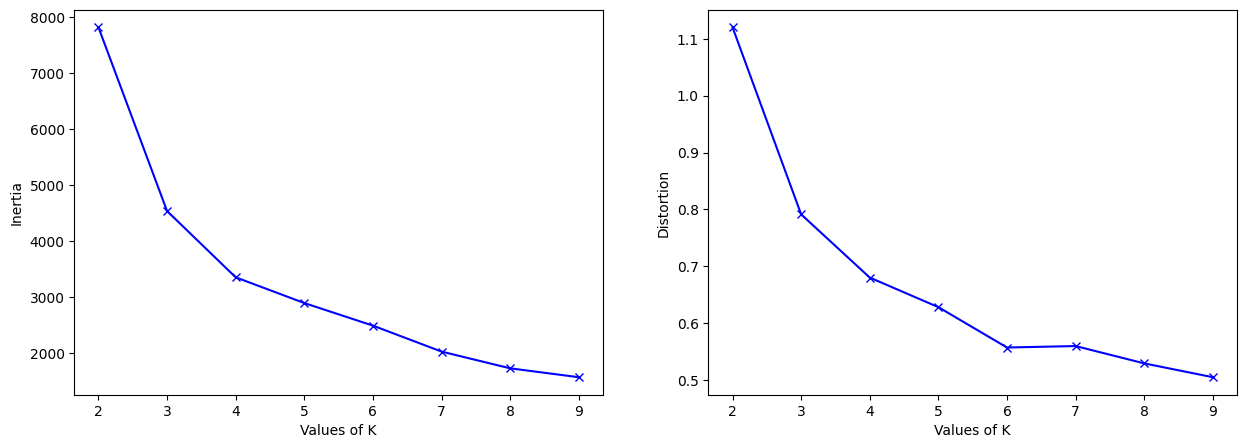

In [57]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(K, inertias, 'bx-')
ax[0].set_xlabel('Values of K')
ax[0].set_ylabel('Inertia')

ax[1].plot(K, distortions, 'bx-')
ax[1].set_xlabel('Values of K')
ax[1].set_ylabel('Distortion')

plt.show()

In [64]:
kmeans = KMeans(3, max_iter=50)
kmeans.fit(rfm_scaled)

KMeans(max_iter=50, n_clusters=3)

In [65]:
rfm['cluster_id'] = kmeans.labels_
rfm.head()

,customerid,recency,frequency,monetary,cluster_id
0,12347,1,7,4310.00,1
1,12348,74,4,1797.24,1
2,12349,18,1,1757.55,1
3,12350,309,1,334.40,0
4,12352,35,11,1545.41,1


<Axes: xlabel='cluster_id', ylabel='frequency'>

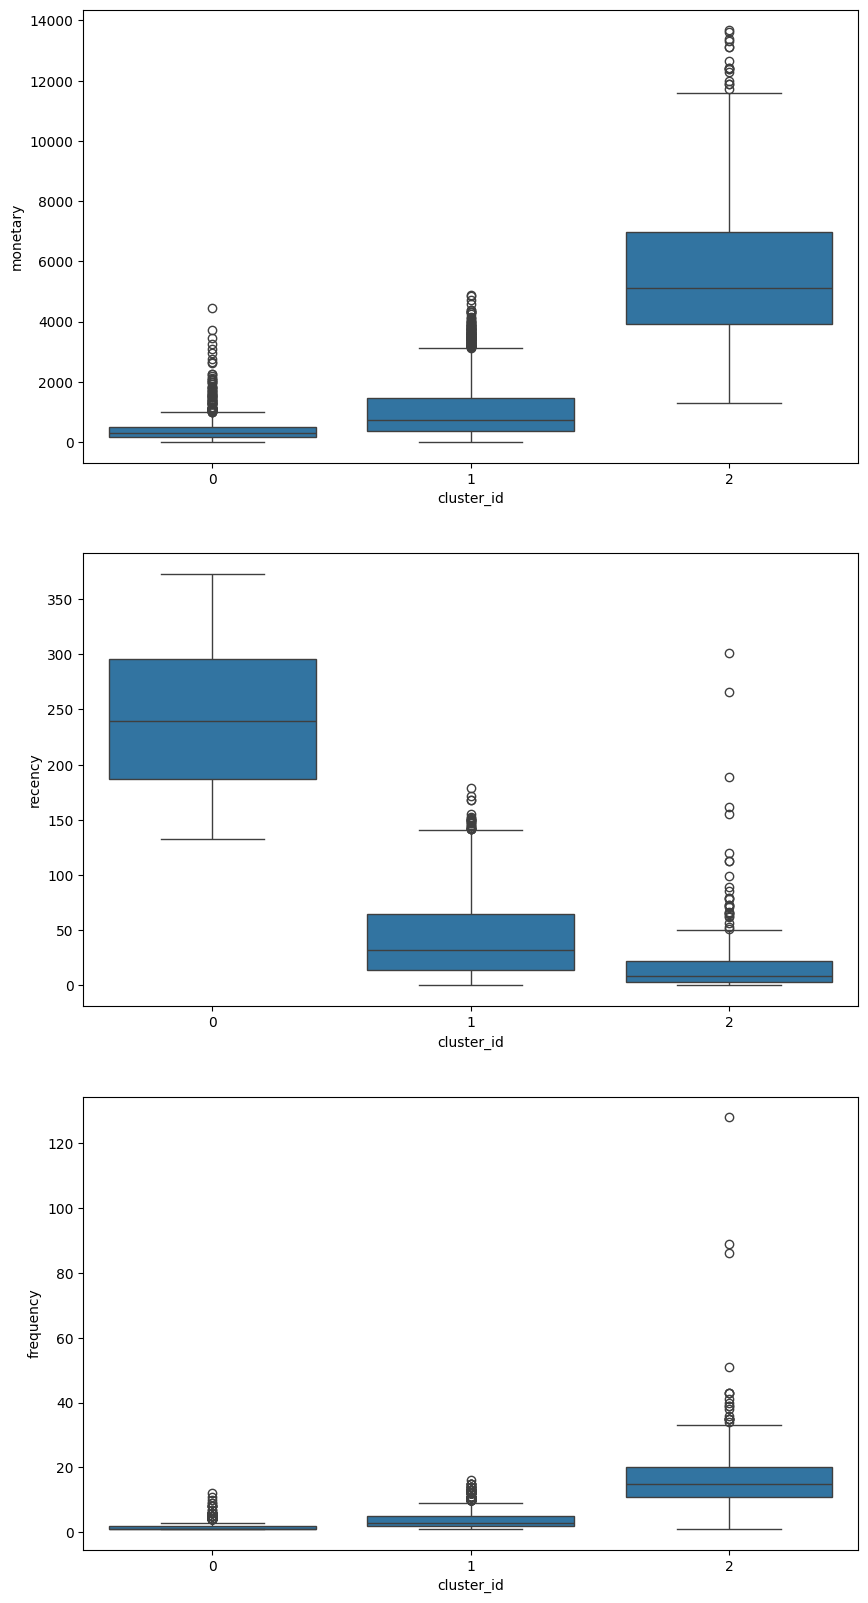

In [66]:
fig, ax = plt.subplots(3,1,figsize=(10,20))

sns.boxplot(x='cluster_id', y='monetary', data=rfm, ax=ax[0])
sns.boxplot(x='cluster_id', y='recency', data=rfm, ax=ax[1])
sns.boxplot(x='cluster_id', y='frequency', data=rfm, ax=ax[2])

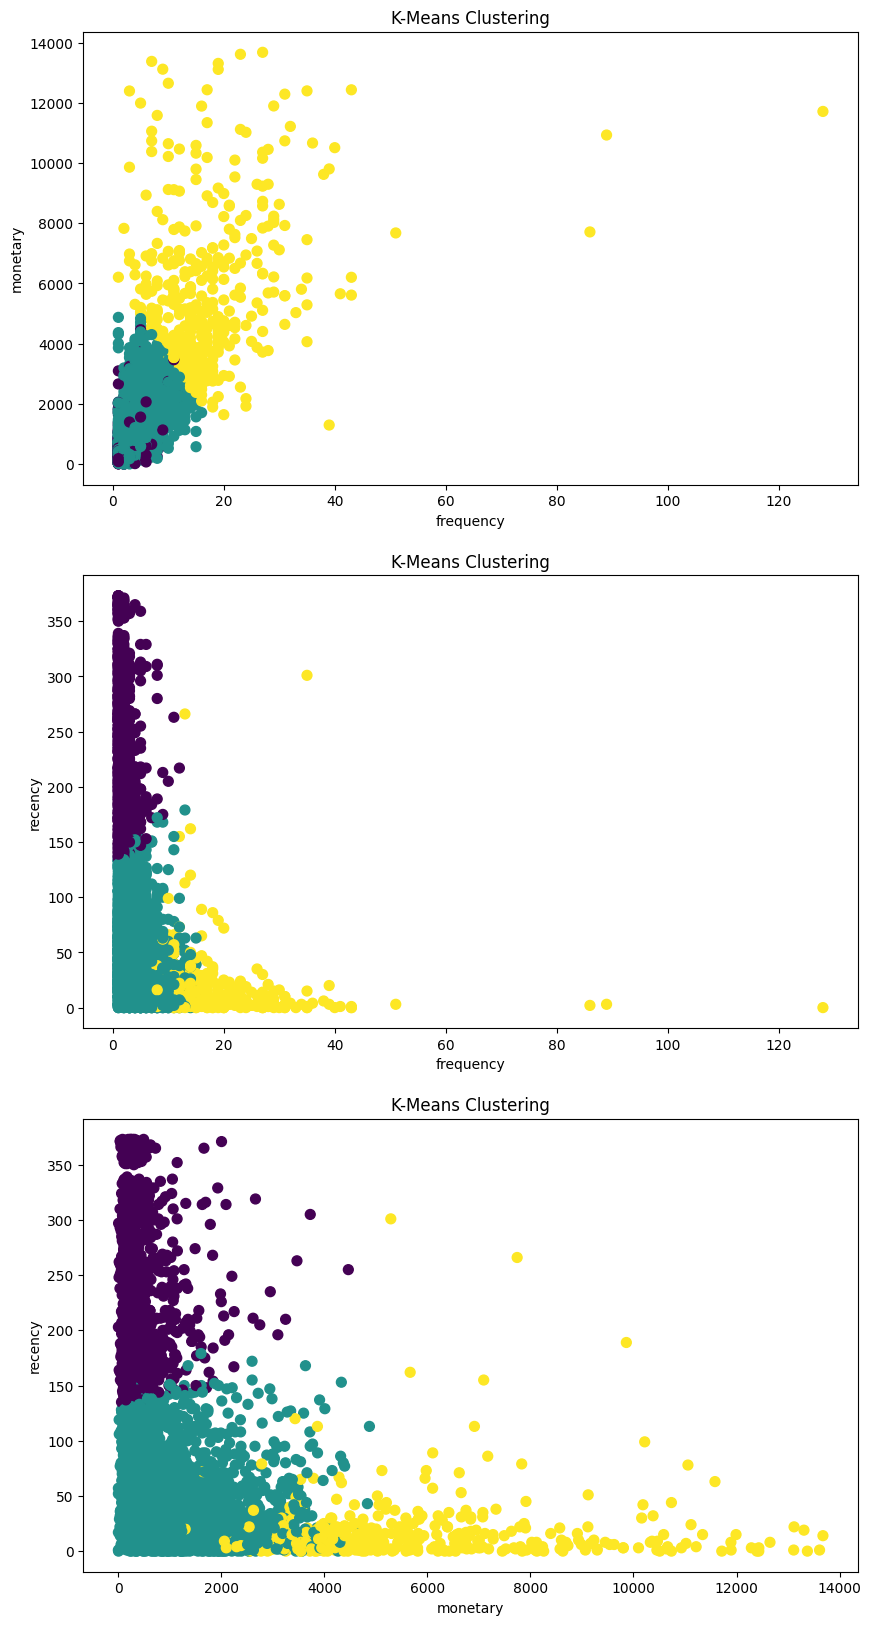

In [67]:
#Plot the clusters obtained using k means

fig, ax = plt.subplots(3,1,figsize=(10,20))
ax[0].scatter(rfm['frequency'],rfm['monetary'],c=rfm['cluster_id'],s=50)
ax[0].set_title('K-Means Clustering')
ax[0].set_xlabel('frequency')
ax[0].set_ylabel('monetary')
#plt.colorbar(scatter)

#Plot the clusters obtained using k means

ax[1].scatter(rfm['frequency'],rfm['recency'],c=rfm['cluster_id'],s=50)
ax[1].set_title('K-Means Clustering')
ax[1].set_xlabel('frequency')
ax[1].set_ylabel('recency')

#Plot the clusters obtained using k means
ax[2].scatter(rfm['monetary'],rfm['recency'],c=rfm['cluster_id'],s=50)
ax[2].set_title('K-Means Clustering')
ax[2].set_xlabel('monetary')
ax[2].set_ylabel('recency')

plt.show()